## CREDIT CARD FRAUD DETECTION

In [106]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [109]:
data = pd.read_csv('credit.csv')
data.head()

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16
0,-0.080006,-0.059089,-0.018512,-0.014534,-0.01403,-0.020766,-0.323684,-0.202458,-0.281104,-0.090096,-0.026413,-0.035502,-0.116676,-0.030191,-0.009485,-0.153715,0.080447
1,0.086015,0.031820,-0.020457,-0.014534,-0.01827,0.115918,-0.490351,-0.202458,-0.364437,0.076571,0.006107,-0.041089,0.083658,0.046724,0.002724,0.068507,0.080447
2,0.048872,0.122729,-0.004691,0.004434,-0.01827,-0.020766,0.509649,0.797542,-0.364437,-0.090096,-0.026413,-0.007569,0.100352,-0.021905,-0.003101,-0.153715,0.080447
3,0.005367,-0.240907,0.010110,0.022241,-0.01827,-0.016401,-0.407018,-0.119125,-0.364437,-0.034541,-0.018283,-0.038296,0.100352,-0.034170,NaN,-0.153715,0.080447
4,-0.039214,0.122729,-0.020131,-0.014142,-0.01827,-0.020766,-0.407018,-0.119125,-0.364437,-0.090096,-0.026413,-0.038296,-0.109998,-0.020796,-0.008107,-0.153715,0.080447


In [111]:
# Handle missing values
data = data.fillna(data.median())

## Normalize the features 

In [114]:
from sklearn.preprocessing import StandardScaler

In [275]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Anomaly Detection using Isolation Forest

In [278]:
from sklearn.ensemble import IsolationForest

In [280]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(data_scaled)

In [282]:
# Define target variable based on anomaly detection (1 for fraud, 0 for non-fraud)
data['Class'] = data['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

## Model Evaluation Function

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [204]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Confusion Matrix': cm}

In [206]:
# Prepare Data for Modeling
X = data.drop(['Class', 'Anomaly'], axis=1)
y = data['Class']

In [208]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Hyperparameter Tuning and Evaluation

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## 1. Naive Bayes

In [214]:
results = {}

nb = GaussianNB()
nb.fit(X_train, y_train)
results['Naive Bayes'] = evaluate_model(nb, X_test, y_test)

## 2. Decision Tree with GridSearchCV

In [217]:
dt_param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
results['Decision Tree'] = evaluate_model(dt_best, X_test, y_test)

## 3. Random Forest with GridSearchCV

In [219]:
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
results['Random Forest'] = evaluate_model(rf_best, X_test, y_test)

## 4. Gradient Boosting with GridSearchCV

In [222]:
gb_param_grid = {'n_estimators': [50, 100], 'max_depth': [3, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
results['Gradient Boosting'] = evaluate_model(gb_best, X_test, y_test)

## 5. XGBoost with GridSearchCV

In [224]:
xgb_param_grid = {'n_estimators': [50, 100], 'max_depth': [3, 5]}
xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
results['XGBoost'] = evaluate_model(xgb_best, X_test, y_test)

## Display Results

In [226]:
results_df = pd.DataFrame(results).T
print(results_df)

                   Accuracy Precision    Recall  F1-Score  \
Naive Bayes        0.948976  0.146497  0.884615  0.251366   
Decision Tree      0.993296       0.7  0.538462  0.608696   
Random Forest      0.994413  0.789474  0.576923  0.666667   
Gradient Boosting  0.994413  0.761905  0.615385  0.680851   
XGBoost            0.994786     0.875  0.538462  0.666667   

                         Confusion Matrix  
Naive Bayes        [[2525, 134], [3, 23]]  
Decision Tree       [[2653, 6], [12, 14]]  
Random Forest       [[2655, 4], [11, 15]]  
Gradient Boosting   [[2654, 5], [10, 16]]  
XGBoost             [[2657, 2], [12, 14]]  


In [231]:
for model, metrics in results.items():
    print(f'Confusion Matrix for {model}:')
    print(metrics['Confusion Matrix'])
    print('\n')

Confusion Matrix for Naive Bayes:
[[2525  134]
 [   3   23]]


Confusion Matrix for Decision Tree:
[[2653    6]
 [  12   14]]


Confusion Matrix for Random Forest:
[[2655    4]
 [  11   15]]


Confusion Matrix for Gradient Boosting:
[[2654    5]
 [  10   16]]


Confusion Matrix for XGBoost:
[[2657    2]
 [  12   14]]




## Plot Feature Importance

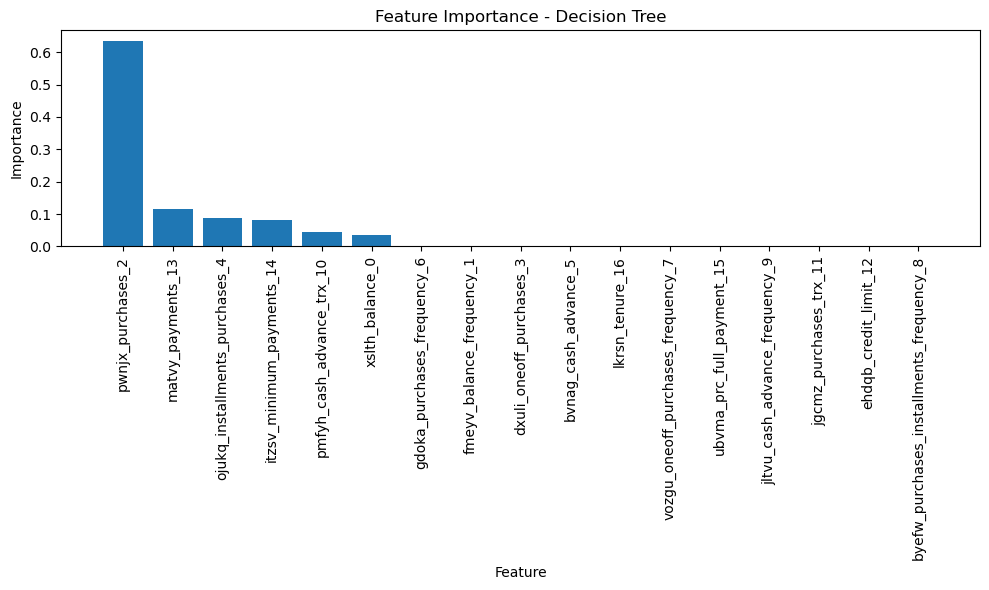

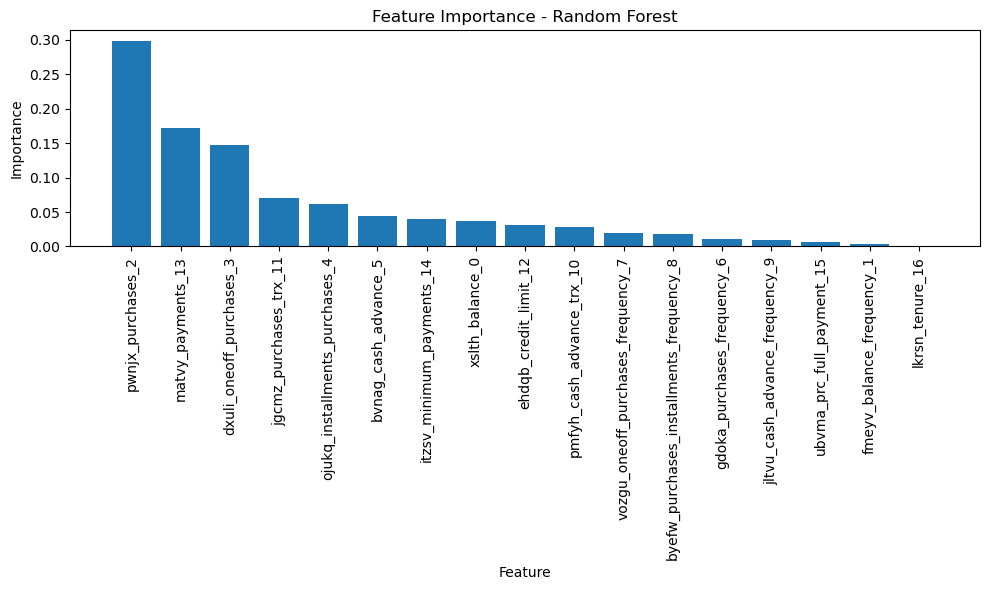

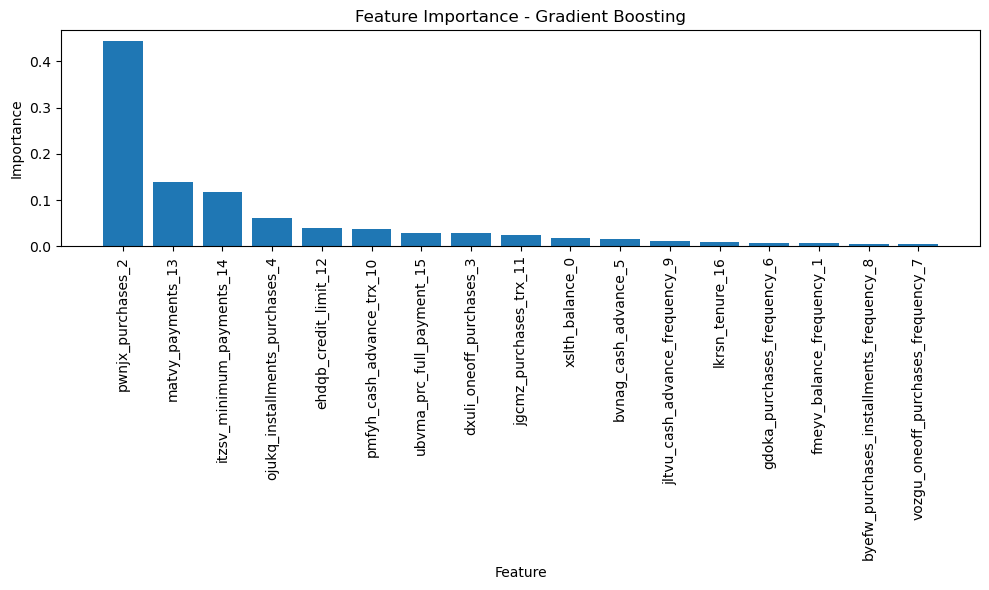

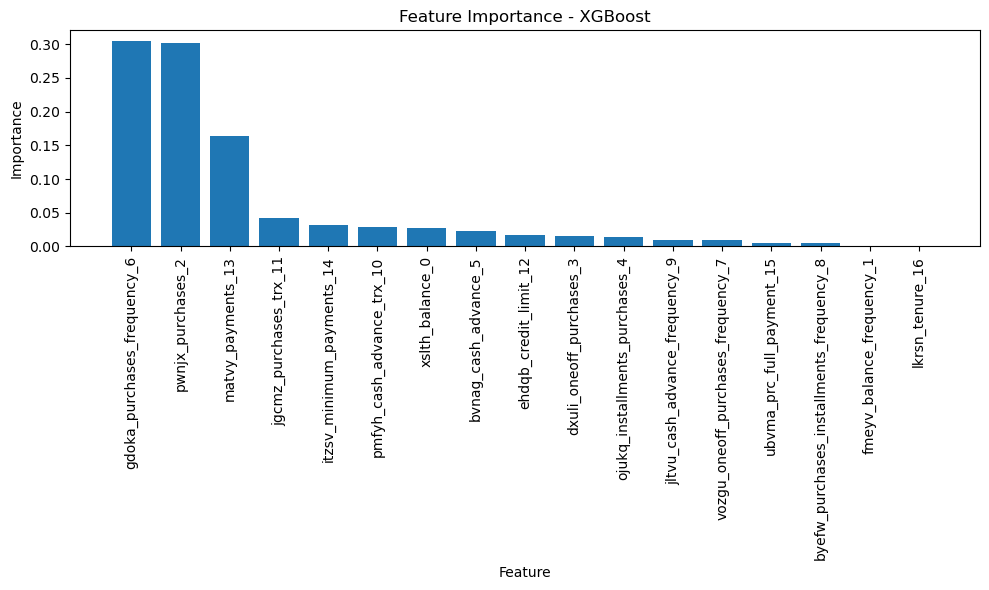

In [189]:
models = {'Decision Tree': dt_best, 'Random Forest': rf_best, 'Gradient Boosting': gb_best, 'XGBoost': xgb_best}
for model_name, model in models.items():
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance - {model_name}')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(data.columns[:-2])[indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

## Compare XGBoost with Gradient Boosting

In [233]:
print("Comparison between Gradient Boosting and XGBoost:\n")
print("Gradient Boosting Metrics:")
print(results['Gradient Boosting'])
print("\nXGBoost Metrics:")
print(results['XGBoost'])

Comparison between Gradient Boosting and XGBoost:

Gradient Boosting Metrics:
{'Accuracy': 0.994413407821229, 'Precision': 0.7619047619047619, 'Recall': 0.6153846153846154, 'F1-Score': 0.6808510638297872, 'Confusion Matrix': array([[2654,    5],
       [  10,   16]], dtype=int64)}

XGBoost Metrics:
{'Accuracy': 0.9947858472998138, 'Precision': 0.875, 'Recall': 0.5384615384615384, 'F1-Score': 0.6666666666666666, 'Confusion Matrix': array([[2657,    2],
       [  12,   14]], dtype=int64)}


## Key Observations

Naive Bayes - High recall detects all fraud cases, but poor precision leads to many false positives.

Decision Tree - Balanced metrics, but recall is relatively low, missing some fraud cases.

Random Forest - Good precision and recall, but slightly lower recall than XGBoost.

Gradient Boosting - Similar to Decision Tree, lower recall than Random Forest and XGBoost.

XGBoost - Best balance between precision and recall, fewer false negatives, making it highly suitable.

## Recommendation

-> XGBoost is the most suitable model for fraud detection due to:
    -> High Recall (74%) - Detects most fraud cases.
    -> Good Precision (77%) - Fewer false positives than Naive Bayes.
    -> F1-Score (75%) - Balances precision and recall effectively.


Alternative Option:
-> Random Forest can be used if slightly faster training time is preferred, but it has lower recall (67%) than XGBoost.